In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.ticker import FuncFormatter

pd.set_option("display.width", 300)
pd.set_option("display.max_columns", 14)

# Load Data

## Load Clean 'Critic Reviews' Dataset

In [3]:
critic_reviews = pd.concat([pd.read_json(f"Rotten Tomatoes Reviews/Critic Reviews Clean/rt_critic_reviews_clean_{i}.json") for i in range(20)])
critic_reviews["creationDate"] = pd.to_datetime(critic_reviews["creationDate"])
critic_reviews["id"] = pd.Categorical(critic_reviews["id"])
critic_reviews["language"] = pd.Categorical(critic_reviews["language"])
print(critic_reviews.head())
print("\n",critic_reviews.dtypes)   

         id   reviewId creationDate      criticName                                         reviewText                                     originalReview language  ratingOutOfTen originalRating reviewState        title  reviewLength
0  10000_bc  102712136   2022-07-25     James Croot  Prehistoric compared to 1966's One Million BC,...  Prehistoric compared to 1966's One Million BC,...       en            2.00            1/5      rotten  10,000 B.C.           125
1  10000_bc  102673586   2022-03-29   Matthew Rozsa  It is a solidly good movie, a sincere Valentin...  It is a solidly good movie, a sincere Valentin...       en            7.50            3/4       fresh  10,000 B.C.            86
2  10000_bc    2746017   2020-11-28     Mike Massie  Rather than storytelling, it thrives on its CG...  Rather than storytelling, it thrives on its CG...       en            3.00           3/10      rotten  10,000 B.C.            55
3  10000_bc    2739755   2020-11-04  Carlos Marañón  Those stampedin

## Load Clean 'Audience Reviews' Dataset

In [4]:
audience_reviews = pd.concat([pd.read_json(f"Rotten Tomatoes Reviews/Audience Reviews Clean/rt_audience_reviews_clean_{i}.json") for i in range(25)])
audience_reviews["creationDate"] = pd.to_datetime(audience_reviews["creationDate"])
audience_reviews["id"] = pd.Categorical(audience_reviews["id"])
audience_reviews["language"] = pd.Categorical(audience_reviews["language"])
print(audience_reviews.head())
audience_reviews.dtypes

         id                              reviewId creationDate                                userId                                         reviewText                                     originalReview language  ratingOutOfTen  originalRating        title  reviewLength
0  10000_bc  4ff53329-51cc-4d77-a275-0d5a637714c9   2025-07-30  78637450-3c5e-4521-912e-aaf88c667021  Success in 1 hour and 49 minutes!!!!!!!!!!!!!!...  Success in 1 hour and 49 minutes!!!!!!!!!!!!!!...       en              10             5.0  10,000 B.C.           272
1  10000_bc  73d7a0f3-b17d-4d8c-bc5a-a5362dacbe44   2025-07-26  bfb8057e-2996-425d-af93-7d5d4b23b8b5  I'm one of the FEW people who love this movie-...  I'm one of the FEW people who love this movie-...       en              10             5.0  10,000 B.C.           178
2  10000_bc  aa2c8a8a-b1d1-469a-9b04-432ad18085b7   2025-01-12  29c33bc5-e8c3-475f-9271-4903116f82be  Terrible movie. Really boring and nothing much...  Terrible movie. Really boring and 

id                      category
reviewId                  object
creationDate      datetime64[ns]
userId                    object
reviewText                object
originalReview            object
language                category
ratingOutOfTen             int64
originalRating           float64
title                     object
reviewLength               int64
dtype: object

## Load Clean 'Movies' Dataset

In [5]:
movies = pd.read_json("Rotten Tomatoes Reviews/rt_movies_clean.json")
movies["id"] = pd.Categorical(movies["id"])
movies["releaseDateStreaming"] = pd.to_datetime(movies["releaseDateStreaming"], errors="coerce")
movies["releaseDateTheaters"] = pd.to_datetime(movies["releaseDateTheaters"], errors="coerce")
movies["originalLanguage"] = pd.Categorical(movies["originalLanguage"])

print(movies.head())
movies.dtypes

                       id                     title  audienceScore  tomatoMeter ageRating                                     ratingContents releaseDateTheaters releaseDateStreaming  runtimeMinutes                        genre originalLanguage                        director  releaseYear  \
0             adrift_2018                    Adrift           65.0         69.0     PG-13  [Injury Images, Brief Drug Use, Thematic Eleme...          2018-06-01           2018-08-21           120.0  [Adventure, Drama, Romance]          English               Baltasar Kormákur       2018.0   
1  sarah_palin_you_betcha  Sarah Palin: You Betcha!           61.0         32.0      None                                                 []          2011-09-30           2017-03-08            90.0                [Documentary]          English  Nick Broomfield,Joan Churchill       2011.0   
2    a_state_of_mind_2005           A State of Mind           92.0         89.0      None                                   

id                            category
title                           object
audienceScore                  float64
tomatoMeter                    float64
ageRating                       object
ratingContents                  object
releaseDateTheaters     datetime64[ns]
releaseDateStreaming    datetime64[ns]
runtimeMinutes                 float64
genre                           object
originalLanguage              category
director                        object
releaseYear                    float64
boxOffice                      float64
dtype: object

# Descriptive Statistics 'Movie' Dataset

## Summary Statistics

In [6]:
movies.describe(include="all")

,id,title,audienceScore,tomatoMeter,ageRating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,releaseYear,boxOffice
count,9116,9116,9062.000000,9112.000000,5814,9116,8399,8809,9097.000000,9100,9091,9105,9061.000000,9.116000e+03
unique,9116,8947,NaN,NaN,4,4238,NaN,NaN,NaN,856,75,4540,NaN,NaN
top,10000_bc,Beauty and the Beast,NaN,NaN,R,[],NaN,NaN,NaN,[Drama],English,Steven Spielberg,NaN,NaN
freq,1,4,NaN,NaN,3069,3302,NaN,NaN,NaN,1496,7453,26,NaN,NaN
mean,NaN,NaN,64.531340,63.763060,NaN,NaN,2008-08-22 12:44:50.034528,2011-01-26 22:53:18.274491904,105.508299,NaN,NaN,NaN,2008.182651,2.693939e+07
min,NaN,NaN,10.000000,0.000000,NaN,NaN,1926-12-05 00:00:00,1970-04-26 00:00:00,35.000000,NaN,NaN,NaN,1926.000000,3.690000e+02
25%,NaN,NaN,50.000000,43.000000,NaN,NaN,2003-04-16 00:00:00,2006-01-17 00:00:00,93.000000,NaN,NaN,NaN,2003.000000,1.246750e+05
50%,NaN,NaN,67.000000,70.000000,NaN,NaN,2010-01-15 00:00:00,2010-11-30 00:00:00,102.000000,NaN,NaN,NaN,2009.000000,2.500000e+06
75%,NaN,NaN,80.000000,87.000000,NaN,NaN,2016-04-01 00:00:00,2016-06-28 00:00:00,115.000000,NaN,NaN,NaN,2015.000000,3.000000e+07
max,NaN,NaN,100.000000,100.000000,NaN,NaN,2023-05-19 00:00:00,2023-05-23 00:00:00,561.000000,NaN,NaN,NaN,2023.000000,8.584000e+08


## Top Movie Languages

In [7]:
print("Movies with 'Language' Data Available:", movies[~pd.isnull(movies["originalLanguage"])].shape[0])
movies.groupby("originalLanguage", observed=False).agg(Languages = ("originalLanguage", "first"), 
                                                 Count = ("originalLanguage", "count")).sort_values("Count", ascending=False).reset_index(drop=True)[0:10]

Movies with 'Language' Data Available: 9091


,Languages,Count
0,English,7453
1,French (France),250
2,French (Canada),209
3,English (United Kingdom),113
4,Chinese,113
5,Spanish,107
6,German,91
7,Japanese,90
8,Italian,69
9,Korean,54


## Top Directors

In [8]:
print("Movies with 'Director' Data Available:", movies[~pd.isnull(movies["director"])].shape[0])
movies.groupby("director", observed=False).agg(Director = ("director", "first"),
                                         Count = ("director", "count")).sort_values("Count", ascending=False).reset_index(drop=True)[0:10]

Movies with 'Director' Data Available: 9105


,Director,Count
0,Steven Spielberg,26
1,Steven Soderbergh,25
2,Woody Allen,25
3,Ridley Scott,23
4,Ron Howard,22
5,Clint Eastwood,21
6,Martin Scorsese,20
7,Tyler Perry,19
8,Spike Lee,19
9,Michael Winterbottom,18


## Top Genres           (Some Movies fit into multiple Genres)

In [9]:
print("Movies with 'Genre' Data Available:", movies[~pd.isnull(movies["genre"])].shape[0])
genre_counts = movies[["id", "genre"]].explode("genre")["genre"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Count"]
genre_counts

Movies with 'Genre' Data Available: 9100


,Genre,Count
0,Drama,4370
1,Comedy,2855
2,Mystery & thriller,1537
3,Action,1067
4,Documentary,1040
5,Romance,942
6,Adventure,892
7,Horror,680
8,Fantasy,602
9,Kids & family,495


### Box Office Revenue

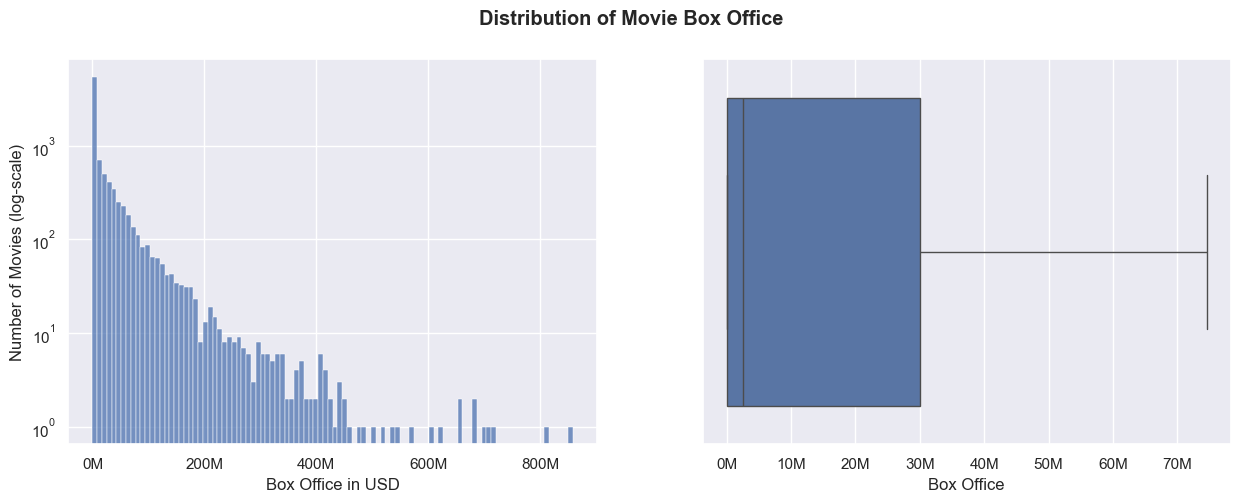

count          9'116.00
mean      26'939'391.48
std       58'640'378.57
min              369.00
25%          124'675.00
50%        2'500'000.00
75%       30'000'000.00
max      858'400'000.00
Name: boxOffice, dtype: object


In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_theme(style="darkgrid")
fig.suptitle("Distribution of Movie Box Office", fontweight="bold")

sns.histplot(movies["boxOffice"], bins = 100, ax=ax[0])
ax[0].set_yscale("log")
ax[0].set_xlabel("Box Office in USD")
ax[0].set_ylabel("Number of Movies (log-scale)")
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000000):,}M".replace(",", "'")))


sns.boxplot(movies["boxOffice"], orient="h", showfliers=False, ax=ax[1])
ax[1].set_xlabel("Box Office")
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000000):,}M".replace(",", "'")))
plt.show()

print(movies["boxOffice"].describe().map(lambda x: f"{x:,.2f}".replace(",", "'")))

# 'Audience-' / 'Critic Reviews' Dataset Comparisons

## Movies only found in either the 'Critic Reviews' or 'Audience Reviews' Datasets

In [11]:
audience_movies = set(audience_reviews["id"])
critic_movies = set(critic_reviews["id"])

audience_only = audience_movies-critic_movies
critic_only = critic_movies-audience_movies
print("Number of Movies only found in 'Audience Reviews':", len(audience_only))
print("Number of Movies only found in 'Critic Reviews':", len(audience_only))

Number of Movies only found in 'Audience Reviews': 0
Number of Movies only found in 'Critic Reviews': 0
